# Clase 5, usando datos de acciones

Vamos a aprender a descargar datos historicos dela bolsa de valores y aplicar los conceptos que hemos visto 

- Leer archivos CSV
- Descargar datos historicos
- Obtener estadísticos básicos

In [ ]:
### Instalar paquete yfinance

## Descargar datos de manera remota

En esta clase estaremos usando yahoo para descargar datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


## Obtener datos diarios, tesla y apple

In [3]:
# Ejemplo yahoo
# https://finance.yahoo.com
df = yf.download("AAPL", start="2017-01-01", end="2017-04-30")


[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.059309,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.029020,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.166468,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.469334,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.720932,134247600
...,...,...,...,...,...,...
2017-04-24,35.875000,35.987499,35.794998,35.910000,33.608692,68537200
2017-04-25,35.977501,36.224998,35.967499,36.132500,33.816944,75486000
2017-04-26,36.117500,36.150002,35.845001,35.919998,33.618061,80164800


In [11]:
# Ahora baja la acción de tesla y apple
tickers = ['AAPL', 'TSLA']
df = yf.download(tickers, start="2017-01-01", end="2017-04-30")['Adj Close'] 
df.head()

#EL [] Sirve para llamar una columna cuando no hay espacios 
# el .algo sirve para cuando no hay espacios 

[*********************100%%**********************]  2 of 2 completed


,AAPL,TSLA
Date,,
2017-01-03,27.059307,14.466000
2017-01-04,27.029024,15.132667
2017-01-05,27.166473,15.116667
2017-01-06,27.469330,15.267333
2017-01-09,27.720942,15.418667


<Axes: xlabel='Date'>

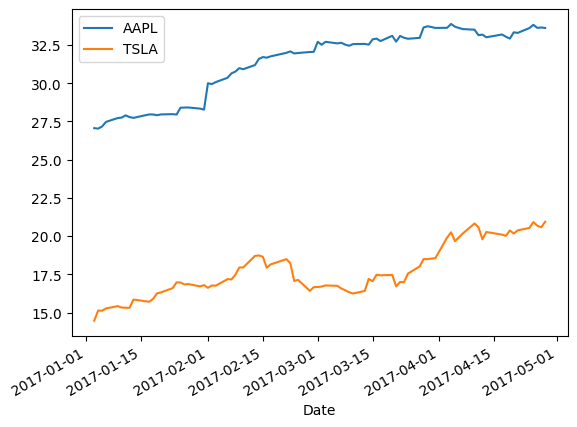

In [13]:
# Gráficamos los precios de cierre
df.plot()

In [58]:
# Ejemplo con acciónes de la bolsa mexicana, baja banorte y walmex
tickers = ['GFNORTEO.MX' ,'WALMEX.MX']
df = yf.download(tickers, start="2017-01-01", end="2023-08-28")['Adj Close'] 
df.head()

[*********************100%%**********************]  2 of 2 completed


,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,75.942490,31.779716
2017-01-03,75.140747,32.320107
2017-01-04,74.197952,32.380154
2017-01-05,74.339005,32.088516
2017-01-06,72.297546,31.333687


### Grafique las acciones de Mexico

<Axes: xlabel='Date'>

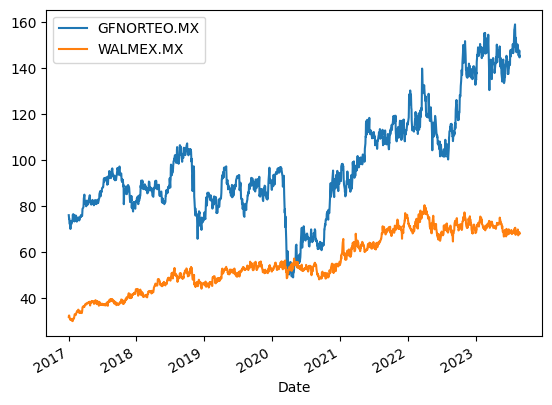

In [59]:
df.plot()

Vamos a sacar el rendimiento, en este caso es diario

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$


In [60]:
### Shift
df.shift().head()

,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,NaN,NaN
2017-01-03,75.942490,31.779716
2017-01-04,75.140747,32.320107
2017-01-05,74.197952,32.380154
2017-01-06,74.339005,32.088516


In [61]:
### Calculamos 
rt = (df - df.shift()) / df.shift()
rt

,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,NaN,NaN
2017-01-03,-0.010557,0.017004
2017-01-04,-0.012547,0.001858
2017-01-05,0.001901,-0.009007
2017-01-06,-0.027461,-0.023523
...,...,...
2023-08-21,0.001858,0.012177
2023-08-22,0.008035,-0.000440
2023-08-23,0.004497,0.006605


In [62]:
### Eliminamos los NAS
rt = rt.dropna()

In [63]:
### Función integrada de pandas
rt = df.pct_change().dropna()
rt

,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-03,-0.010557,0.017004
2017-01-04,-0.012547,0.001858
2017-01-05,0.001901,-0.009007
2017-01-06,-0.027461,-0.023523
2017-01-09,-0.005955,-0.017520
...,...,...
2023-08-21,0.001858,0.012177
2023-08-22,0.008035,-0.000440
2023-08-23,0.004497,0.006605


In [64]:
rt['WALMEX.MX'].mean() * 252

0.14535464979553087

In [65]:
import numpy as np
np.sqrt(rt['WALMEX.MX'].var() * 252 )

0.2489142971400792

In [66]:
rt['WALMEX.MX'].std() * np.sqrt(252)

0.24891429714007923

### Supon que cada rendimiento es una muestra independiente de cada día

¿Cuál es el valor esperado de caa acción?


$$E[rendimiento] = \Sigma p_i x_i $$

In [67]:
rt['WALMEX.MX'].mean() * 252 

0.14535464979553087

In [68]:
rt['WALMEX.MX'].std() * np.sqrt(252)

0.24891429714007923

Calcula la volatilidad si cada rendimiento es independiente y ningun día del pasado es más importante que otros

$$Var(x) = \Sigma p_i (x - E[x])^2 $$
$$\sigma = \sqrt{var(x)} $$

array([[<Axes: title={'center': 'GFNORTEO.MX'}>,
        <Axes: title={'center': 'WALMEX.MX'}>]], dtype=object)

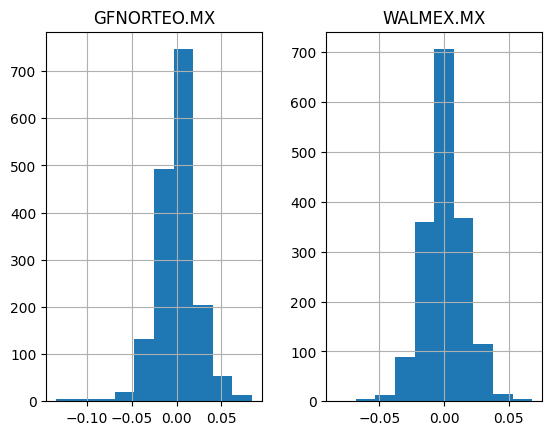

In [69]:
# Histograma de los rendimientos
rt.hist()

### Banorte

- Rendimiento aritmético
- Rendimiento geométrico
- Comprobar que rendimiento geométrico cuadre con aritético
- Rendimiento usando precio final y precio inicial


Recordando que los rendimientos son: 


$r_a = (\prod_{i=1}^{T}(1+r_i)) - 1$

$\bar{r}_g=\left[\prod_{i=1}^{T}(1+r_i)\right]^{1/T}-1.$

Crea una función para calcular los mismos

In [70]:
# Aritmético = de inicio a fin, cuando lana ganaste 
(1 + rt['GFNORTEO.MX']).prod()

1.9113146621225459

In [71]:
# Geometrico = como puedes llegar del valor inicial al valor final, con un interes compuesto 
t = len(rt)
rg = (((1 + rt['GFNORTEO.MX']).prod()) ** (1/t)) -1
rg

0.00038727838598506814

$ VF = VP * (1 + i)^t$

In [72]:
#valor futuro banorte 
df['GFNORTEO.MX'].iloc[0] * (1 + rg) ** t

145.14999389646368

In [73]:
df.tail()

,GFNORTEO.MX,WALMEX.MX
Date,,
2023-08-21,145.610001,68.160004
2023-08-22,146.779999,68.129997
2023-08-23,147.440002,68.580002
2023-08-24,144.460007,67.779999
2023-08-25,145.149994,67.900002


In [74]:
# Comprobar que cuadre


###  Walmex

- Rendimiento aritmético
- Rendimiento geométrico
- Comprobar que rendimiento geométrico cuadre con aritmético
- Rendimiento usando precio final y precio inicial

In [75]:
# Aritmético
(1 + rt['WALMEX.MX']).prod()

2.1365829850500497

In [76]:
# Geometrico
rg_walmex = ((1 + rt['WALMEX.MX']).prod()) ** (1/t) - 1 
rg_walmex

0.00045390323212401995

$$Inicial * (1+geometrico)^n  = Final$$

In [77]:
# Comprobar rendimiento queométrico
vp = df['WALMEX.MX'].iloc[0]

vf = vp * (1 + rg_walmex) ** t
vf

67.90000152588156

In [78]:
df.tail()

,GFNORTEO.MX,WALMEX.MX
Date,,
2023-08-21,145.610001,68.160004
2023-08-22,146.779999,68.129997
2023-08-23,147.440002,68.580002
2023-08-24,144.460007,67.779999
2023-08-25,145.149994,67.900002


In [79]:
# Rendimiento usando precio final y precio inicial


In [80]:
# Grafique la acción con el rendimiento geometrico 


### Riesgo y rendimiento, concepto 

Calcule el riesgo y volatilidad para estos tickes: 

['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT']



¿Hay alguna relación entre el riesgo y el rendimiento? Justifique su respuesta

In [83]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT', 'TSLA]
df = yf.download(tickers, start="2017-01-01", end="2023-08-30")['Adj Close'] 
df.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,AMZN,COST,GOOGL,MSFT
Date,,,,,
2017-01-03,27.059309,37.683498,140.838531,40.400501,57.254707
2017-01-04,27.029022,37.859001,140.864975,40.388500,56.998535
2017-01-05,27.166473,39.022499,143.642487,40.651001,56.998535
2017-01-06,27.469337,39.799500,143.571930,41.260502,57.492577
2017-01-09,27.720938,39.846001,141.931900,41.359001,57.309589


In [84]:
rt = df.pct_change()
rt.head()

,AAPL,AMZN,COST,GOOGL,MSFT
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.004657,0.000188,-0.000297,-0.004474
2017-01-05,0.005085,0.030732,0.019718,0.006499,0.000000
2017-01-06,0.011148,0.019912,-0.000491,0.014994,0.008668
2017-01-09,0.009159,0.001168,-0.011423,0.002387,-0.003183


Ojo, para convertir a base anual 

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

### Mostrar regresión 

In [85]:
rendimientos_promedios = rt.mean() * 252 
volatilidades = rt.std() * np.sqrt(252)

In [88]:
rendimientos_promedios 

AAPL     0.332449
AMZN     0.247483
COST     0.228155
GOOGL    0.221071
MSFT     0.302550
dtype: float64

In [86]:
volatilidades 

AAPL     0.305637
AMZN     0.338886
COST     0.230818
GOOGL    0.295970
MSFT     0.288122
dtype: float64

In [ ]:
plt.scatter(volatilidades, rendimientos)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento') 

In [31]:
### Grafica volatiliad vs valor esperado

## Quiz 

In [3]:
import pandas as pd
import numpy as np

In [9]:
tabla2 = pd.DataFrame(columns=['prob', 'ret'], 
                      index=['recesion', 'normalidad', 'expansion'])
tabla2.index.name = 'Pregunta2'
tabla2['prob'] = [0.4, 0.3, 0.3]
tabla2['ret'] = [-0.1, 0.08, 0.23]
tabla2

,prob,ret
Pregunta2,,
recesion,0.4,-0.10
normalidad,0.3,0.08
expansion,0.3,0.23


In [11]:
a = (1 + tabla2.ret).prod()
np.round(a, 3) 

1.196

In [14]:
var = tabla2.ret.var()
np.round(var, 3) 

0.027

In [18]:
tabla3 = pd.DataFrame({'r': [-0.07, 0.04, 0.1, -0.08, 0.15]})
tabla 

,r
0,-0.07
1,0.04
2,0.10
3,-0.08
4,0.15


In [26]:
#Aritmetico 
b = (1 + tabla3.r).prod()
np.round(b, 3)

1.126

In [27]:
#geometrico 
t = len(tabla3) 
rg = ((1 + tabla3.r).prod()) ** (1/t) - 1 
np.round(rg, 3)

0.024

In [25]:
rg 

0.02395041921708474

In [31]:
esperado_promedio =np.mean(tabla3.r)
np.round(esperado_promedio, 3)

0.028

In [34]:
tabla3 = pd.DataFrame({'r': [-0.07, 0.04, 0.1, -0.08, 0.15]})
tabla3['prob'] = [0.4, 0.4, 0.4, 0.4, 0.4]
tabla3

,r,prob
0,-0.07,0.4
1,0.04,0.4
2,0.10,0.4
3,-0.08,0.4
4,0.15,0.4


In [37]:
std = tabla3.r.std()
np.round(std, 3)

0.102